In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp /content/gdrive/MyDrive/2390_Qi_Tian/2390--Spring2022/Week03/*.mat /content/

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch, get_window
import scipy.io as scio
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
samplingFrequency = 500
sub1_s1_data = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series1_data.csv')
sub1_s1_events = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series1_events.csv')
sub1_s1_events = sub1_s1_events.to_numpy()[:,1:].astype(int)

sub1_s2_data = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series2_data.csv')
sub1_s2_events = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series2_events.csv')
sub1_s2_events = sub1_s2_events.to_numpy()[:,1:].astype(int)

sub1_s3_data = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series3_data.csv')
sub1_s3_events = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series3_events.csv')
sub1_s3_events = sub1_s3_events.to_numpy()[:,1:].astype(int)

sub1_s4_data = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series4_data.csv')
sub1_s4_events = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series4_events.csv')
sub1_s4_events = sub1_s4_events.to_numpy()[:,1:].astype(int)

sub1_s5_data = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series5_data.csv')
sub1_s5_events = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series5_events.csv')
sub1_s5_events = sub1_s5_events.to_numpy()[:,1:].astype(int)

sub1_s6_data = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series6_data.csv')
sub1_s6_events = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series6_events.csv')
sub1_s6_events = sub1_s6_events.to_numpy()[:,1:].astype(int)

sub1_s7_data = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series7_data.csv')
sub1_s7_events = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series7_events.csv')
sub1_s7_events = sub1_s7_events.to_numpy()[:,1:].astype(int)

sub1_s8_data = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series8_data.csv')
sub1_s8_events = pd.read_csv('/content/gdrive/MyDrive/2390_Qi_Tian/subj1_series8_events.csv')
sub1_s8_events = sub1_s8_events.to_numpy()[:,1:].astype(int)






In [ ]:
print(sub1_s1_events.shape[0]+sub1_s2_events.shape[0]+sub1_s3_events.shape[0]+sub1_s4_events.shape[0]+sub1_s5_events.shape[0]+sub1_s6_events.shape[0]+sub1_s7_events.shape[0]+sub1_s8_events.shape[0])


1422392


In [ ]:
labels = np.concatenate([sub1_s1_events,sub1_s2_events,sub1_s3_events,sub1_s4_events,sub1_s5_events,sub1_s6_events,sub1_s7_events,sub1_s8_events])
labels = labels[:1422000]
#labels = labels.reshape(-1,500,6)
#labels = labels[:,0,:]

#labels = labels[:,0]
print(labels[:,0].shape)

(1422000,)


In [ ]:
data = pd.concat([sub1_s1_data,sub1_s2_data,sub1_s3_data,sub1_s4_data,sub1_s5_data,sub1_s6_data,sub1_s7_data,sub1_s8_data])

data = np.transpose(data.to_numpy()[:,1:])
data = data.astype(float)

mean = np.mean(data,axis=1)
std = np.std(data,axis=1)
data = np.transpose(data)-mean


data = data/std
data = data[:1422000,:]
print(data)
print(data.shape)

#data = data.reshape(32,-1,500)
#print(data.shape)


[[-0.54409792  0.2223437  -0.77413519 ...  0.70542445  0.74976174
   2.70760351]
 [-0.53920664  0.15129877 -0.74927887 ...  0.52711447  0.56148569
   2.85887406]
 [-0.88893327 -0.06521913 -1.30108937 ...  0.52711447  0.45462631
   2.5838367 ]
 ...
 [-0.30931641 -0.81288249 -0.21238215 ... -0.49259569  0.3935638
  -1.07416022]
 [-0.45360922 -0.99218637 -0.37643393 ... -0.58175067  0.19002212
  -1.19792704]
 [-0.58322818 -0.80273321 -0.67470988 ... -0.40901289  0.2968815
  -1.05124044]]
(1422000, 32)


In [ ]:
print(data.shape)
data = data.reshape(-1,500,32)
print(data.shape)
print(data[:,:,0])

labels = labels[range(0,1422000,500),0].astype(int)

print(labels.shape)

(1422000, 32)
(2844, 500, 32)
[[-0.54409792 -0.53920664 -0.88893327 ...  0.32655018  0.19448558
   0.21649635]
 [ 0.32410454  0.72029834  0.83279781 ...  0.93551472  0.94774293
   0.9819819 ]
 [ 0.95752549  0.81567833  0.95997113 ...  0.7961132   0.57600553
   0.62491835]
 ...
 [-0.84002045 -0.81800969 -0.78377072 ... -0.79844456 -0.73974918
  -0.50496767]
 [-0.45360922 -0.61013022 -0.70551021 ... -0.66393432 -0.52942408
  -0.55388049]
 [-0.44627229 -0.33621846 -0.38513128 ... -0.30931641 -0.45360922
  -0.58322818]]
(2844,)


In [ ]:
fs = 500
window = get_window('hamming', fs)
nfft = fs
step = fs // nfft



segments = [[] for _ in range(2844)]

for j in range(32):
  for i in range(data.shape[0]):
    freq, psd = welch(data[i,:,j], window=window, fs=fs, nfft=nfft)
    total_energy = np.trapz(psd, freq)
    segments[i].append(np.trapz(psd[0:4 + step], range(0, 4 + step, step)) / total_energy)
    segments[i].append(np.trapz(psd[4:8 + step], range(4, 8 + step, step)) / total_energy)
    segments[i].append(np.trapz(psd[8:13 + step], range(8, 13 + step, step)) / total_energy)
    segments[i].append(np.trapz(psd[13:35 + step], range(13, 35 + step, step)) / total_energy)
  


features = np.asarray(segments).astype(float)

print(features.shape)




(2844, 128)


In [ ]:
print(features.shape)
print(features[0])
features_img = features.reshape(2844,32,4)
features_img = np.transpose(features_img)
features_img = features_img.reshape(4,8,4,2844)
print(features_img.shape)
print(features_img[:,:,:,0])

features_img = np.moveaxis(features_img, -1, 0)
print(features_img.shape)
print(features_img[0])

(2844, 128)
[0.38045219 0.02711433 0.01354056 0.25845547 0.19336785 0.01655131
 0.00907421 0.32447121 0.65711724 0.03361563 0.01503062 0.12297558
 0.22160998 0.03176863 0.00979176 0.20381373 0.27485488 0.07213541
 0.03989123 0.21812485 0.04517193 0.01384667 0.01006302 0.22788334
 0.48528813 0.04890539 0.02184763 0.08429804 0.47117143 0.01931754
 0.01933124 0.15242521 0.50429188 0.09502873 0.07822364 0.10000373
 0.39697192 0.04591458 0.01796045 0.20824192 0.50273301 0.04689163
 0.04126827 0.09470354 0.65838509 0.01992132 0.0160254  0.07128476
 0.67099874 0.04680335 0.06553011 0.07188915 0.45706022 0.08321691
 0.12304862 0.17891203 0.69206505 0.07281349 0.02867309 0.10990341
 0.59921883 0.04954249 0.01519299 0.11036968 0.72524976 0.04009306
 0.0240992  0.06092681 0.76482489 0.03041085 0.03394717 0.07214343
 0.6660763  0.06274927 0.09799466 0.08447975 0.78333257 0.05964246
 0.03957411 0.04632377 0.63354166 0.05592353 0.01815525 0.0443956
 0.67265005 0.03819505 0.01880199 0.05863988 0.7230

In [ ]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

--2022-04-18 02:47:57--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6371 (6.2K) [text/plain]
Saving to: ‘pytorchcv.py.1’

pytorchcv.py.1      100%[===================>]   6.22K  --.-KB/s    in 0s      

2022-04-18 02:47:57 (67.3 MB/s) - ‘pytorchcv.py.1’ saved [6371/6371]



In [ ]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import TensorDataset,Dataset
from torch.utils.data import DataLoader
from pytorchcv import load_mnist, train, plot_results, plot_convolution, display_dataset
from torchsummary import summary
import torch.nn.functional as F

In [ ]:
x_train = features_img[:2400]
x_test = features_img[2400:]
y_train = labels[:2400]
y_test = labels[2400:]
y_train = y_train[:,None]
y_test = y_test[:,None]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(2400, 4, 8, 4)
(2400, 1)
(444, 4, 8, 4)
(444, 1)


In [ ]:
train_loader = DataLoader(TensorDataset(torch.tensor(x_train).float(),torch.tensor(y_train).float()),
                     shuffle = True, batch_size = 8)
test_loader = DataLoader(TensorDataset(torch.tensor(x_test).float(),torch.tensor(y_test).float()),
                     shuffle = False, batch_size = 8)




In [ ]:
for i, (images, labels) in enumerate(train_loader):
    if i <5:
      print(images.shape)
      print(labels)

In [ ]:
class OneConv(nn.Module):
    def __init__(self):
        super(OneConv, self).__init__()
        self.conv = nn.Conv2d(in_channels=4,out_channels=1,kernel_size=(8,4))
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(1,1)

    def forward(self, x):
        x = nn.functional.relu(self.conv(x))
        x = self.flatten(x)
        x = nn.functional.sigmoid(self.fc(x))
        
    
        return x

net = OneConv()

summary(net,(4,8,4))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 1, 1, 1]             129
           Flatten-2                    [-1, 1]               0
            Linear-3                    [-1, 1]               2
Total params: 131
Trainable params: 131
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch  0, Train acc=7.810, Val acc=7.676, Train loss=0.025, Val loss=0.021
Epoch  1, Train acc=7.810, Val acc=7.676, Train loss=0.016, Val loss=0.020
Epoch  2, Train acc=7.810, Val acc=7.676, Train loss=0.015, Val loss=0.019
Epoch  3, Train acc=7.810, Val acc=7.676, Train loss=0.014, Val loss=0.019
Epoch  4, Train acc=7.810, Val acc=7.676, Train loss=0.014, Val loss=0.020
Epoch  5, Train acc=7.810, Val acc=7.676, Train loss=0.014, Val loss=0.020
Epoch  6, Train acc=7.810, Val acc=7.676, Train loss=0.014, Val loss=0.020
Epoch  7, Train acc=7.810, Val acc=7.676, Train loss=0.014, Val loss=0.020
Epoch  8, Train acc=7.810, Val acc=7.676, Train loss=0.014, Val loss=0.020
Epoch  9, Train acc=7.810, Val acc=7.676, Train loss=0.014, Val loss=0.020
Epoch 10, Train acc=7.810, Val acc=7.676, Train loss=0.014, Val loss=0.020
Epoch 11, Train acc=7.810, Val acc=7.676, Train loss=0.014, Val loss=0.020
Epoch 12, Train acc=7.810, Val acc=7.676, Train loss=0.014, Val loss=0.020
Epoch 13, Train acc=7.810

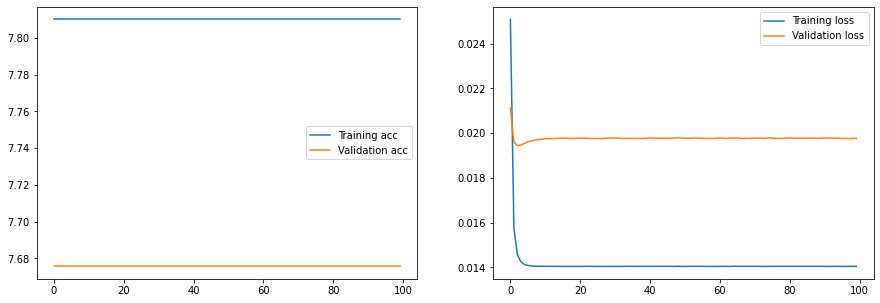

In [ ]:
opt = torch.optim.SGD(net.parameters(),lr=0.01,momentum=0.8)
hist = train(net, train_loader, test_loader, epochs=100, optimizer=opt, loss_fn=nn.BCELoss())

plot_results(hist)

In [ ]:
net.eval()

OneConv(
  (conv): Conv2d(4, 1000, kernel_size=(8, 4), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=1000, out_features=1, bias=True)
)

In [ ]:
df.to_csv('t_domain',index=False)

In [ ]:

#迭代数据
for batch, in dl:
    print(batch.size())


torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([10, 4, 8, 4])
torch.Size([

In [ ]:
class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.hidden3 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)
        out = self.hidden2(out)
        out = F.relu(out)
        out = self.predict(out)
        out = F.softmax(out)
        
      

        return out

In [ ]:
net1 = Net(128,64,6)
optimizer = torch.optim.SGD(net1.parameters(),lr = 0.001)
loss_func = torch.nn.MSELoss()

In [ ]:
for epoch in range(500):
    index = np.random.randint(features.shape[0], size=64)
    x = torch.tensor(features[index, :]).float()
    
    y = torch.tensor(labels[index,:]).float()
    y_pred = net1(x)
    loss = loss_func(y_pred, y)
    print('epoch: ', epoch,' loss: ', loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
x = torch.tensor(features[:50, :]).float()
y_pred=net1(x)
print(y_pred)
y_pred = torch.argmax(y_pred, dim=1)
print(y_pred)

labels = torch.argmax(torch.tensor(labels), dim=1)
print(labels)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
print(sub1_s1_data.columns)
print(sub1_s1_events.columns)

Index(['id', 'Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2',
       'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6',
       'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10'],
      dtype='object')
Index(['id', 'HandStart', 'FirstDigitTouch', 'BothStartLoadPhase', 'LiftOff',
       'Replace', 'BothReleased'],
      dtype='object')


In [ ]:
normalized = normalize(sub1_s1_data)